<a href="https://colab.research.google.com/github/lonecoder007/practice_projects-of-Artificial-neural-network/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(xtrain,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)

(60000, 28, 28)


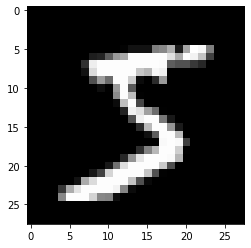

In [ ]:
plt.imshow(xtrain[0],cmap='gray')

In [ ]:
#normalize
x_train=(xtrain.astype('float')-127.5)/127.5
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [ ]:
total_epoch=50
batch_size=256
no_of_batch=int(x_train.shape[0]/batch_size)
half_batch=batch_size//2
noise_dim=100
adam=Adam(learning_rate=2e-4,beta_1=0.5)


In [ ]:
genertaor=Sequential()
genertaor.add(Dense(256,input_shape=(noise_dim,)))
genertaor.add(LeakyReLU(0.2))
genertaor.add(Dense(512))
genertaor.add(LeakyReLU(0.2))
genertaor.add(Dense(1024))
genertaor.add(LeakyReLU(0.2))
genertaor.add(Dense(784,activation='tanh'))

genertaor.compile(loss='binary_crossentropy',optimizer=adam)
genertaor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [ ]:
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Gan
discriminator.trainable=False
gan_input=Input(shape=(noise_dim,))
generted_img=genertaor(gan_input)
gan_output=discriminator(generted_img)

model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [ ]:
x_train=x_train.reshape(-1,784)


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
def save_imgs(epoch,sample=100):
  noise=np.random.normal(0,1,size=(sample,noise_dim))
  img=genertaor.predict(noise)
  img=img.reshape(sample,28,28)
  plt.figure(figsize=(10,10))
  for i in range(sample):
    plt.subplot(10,10,i+1)
    plt.imshow(img[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
  
  plt.tight_layout()

  plt.show()




1 0.6506923068410311 0.9165909790839905
2 0.640700642306071 1.035698562860489
3 0.6360690820420909 1.0917568606698616
4 0.6158269369958812 1.153601112528744
5 0.6039884192948668 1.232391057870327
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/gan_gen5.hf/assets


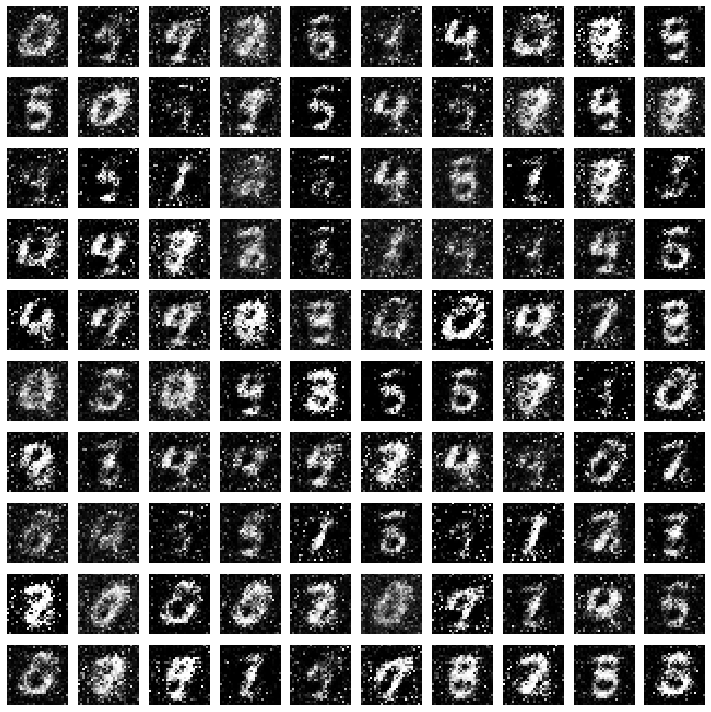

6 0.5861453673778436 1.2622104990176666
7 0.6121889599877545 1.1448972836518898
8 0.6290162683934228 1.089752544195224
9 0.6318827803190957 1.059743793346943
10 0.6503691269546492 1.0056126749413645
INFO:tensorflow:Assets written to: model/gan_gen10.hf/assets


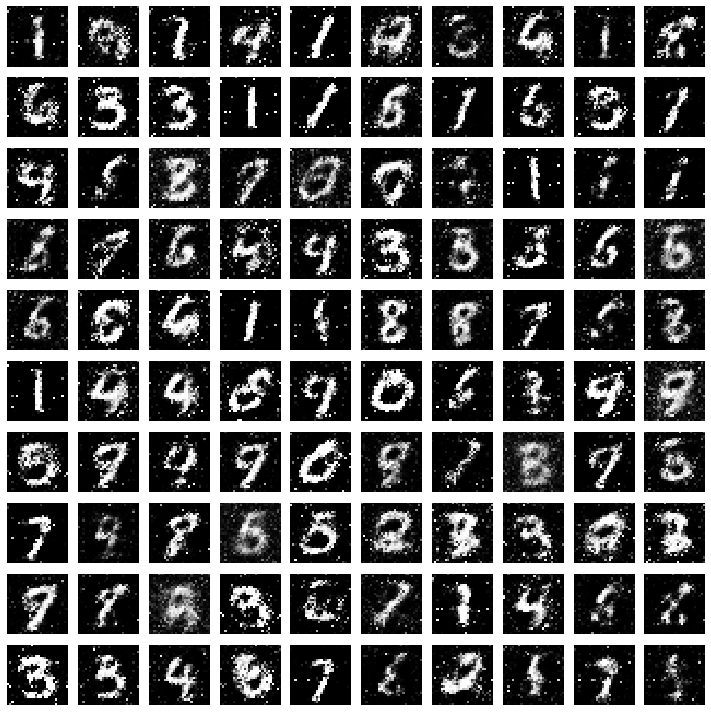

11 0.6520913166877551 0.9878378706610101
12 0.6475566179197059 0.9972550647381024
13 0.6450404920893856 1.0061258676215115
14 0.6485673465535172 0.9990162783198886
15 0.6514489375627958 0.9878795202980694
INFO:tensorflow:Assets written to: model/gan_gen15.hf/assets


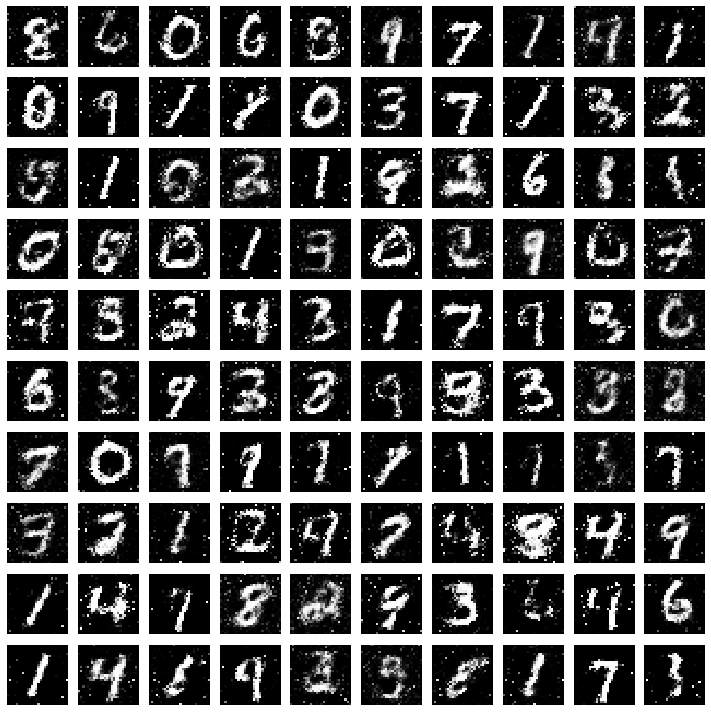

16 0.6527630330150963 0.990856581264072
17 0.6539720975690417 0.9903375717819246
18 0.6559230617733083 0.9866423721496875
19 0.6574327116593336 0.9808526762530335
20 0.65866977460364 0.9786862534844977
INFO:tensorflow:Assets written to: model/gan_gen20.hf/assets


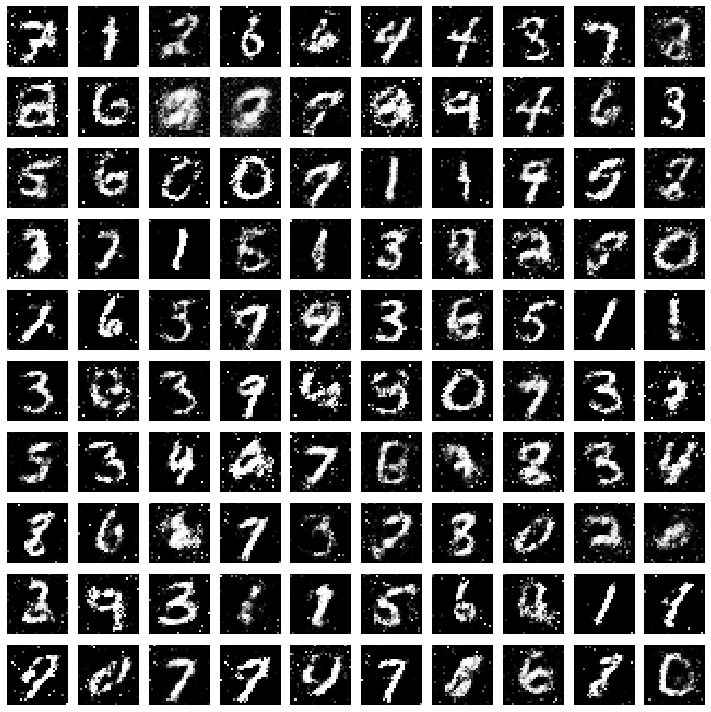

21 0.6621595142234085 0.9758894407851064
22 0.666752860077426 0.9530536715800946
23 0.6663461945250503 0.9619070981812273
24 0.6673709780741961 0.9593774289147466
25 0.6649581092035669 0.9615852366655301
INFO:tensorflow:Assets written to: model/gan_gen25.hf/assets


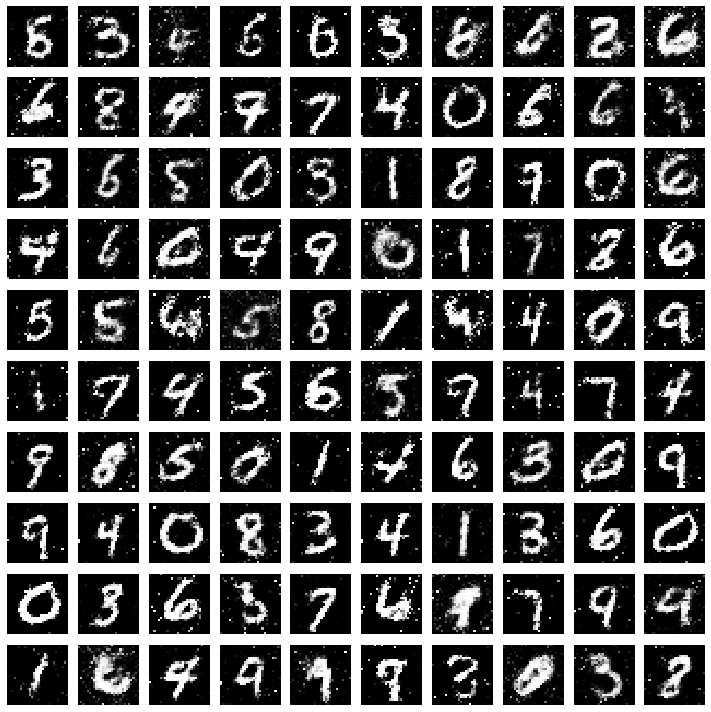

26 0.6640701805933927 0.9548593000469044
27 0.6654347229717125 0.9705825432752951
28 0.6642074187596639 0.9643397996058831
29 0.6648955771810988 0.9617258213524126
30 0.6673045661459621 0.9607667255605388
INFO:tensorflow:Assets written to: model/gan_gen30.hf/assets


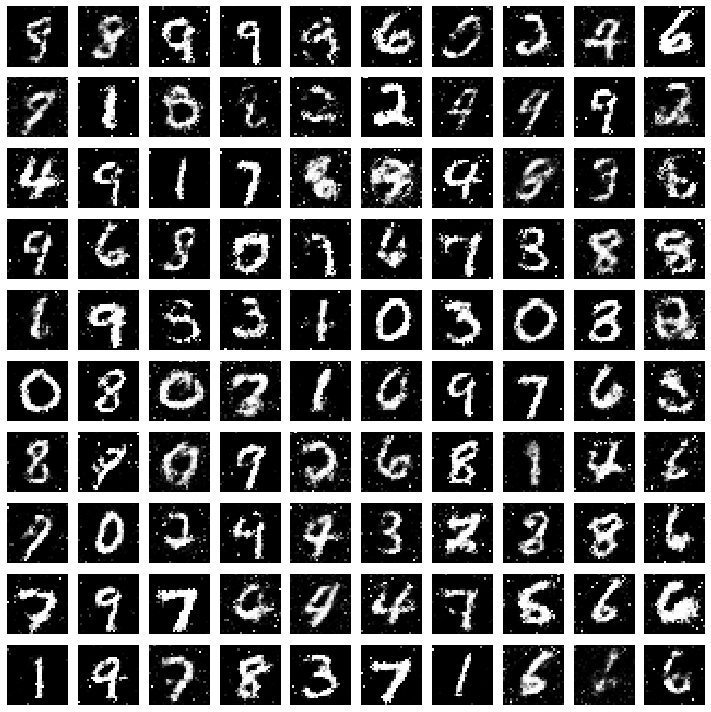

31 0.6671206771563261 0.9626016476724901
32 0.6664230181620672 0.964100752885525
33 0.6665185819833707 0.9568487311530317
34 0.6679063035636885 0.9616701169910594
35 0.6681033938358991 0.9553734642318171
INFO:tensorflow:Assets written to: model/gan_gen35.hf/assets


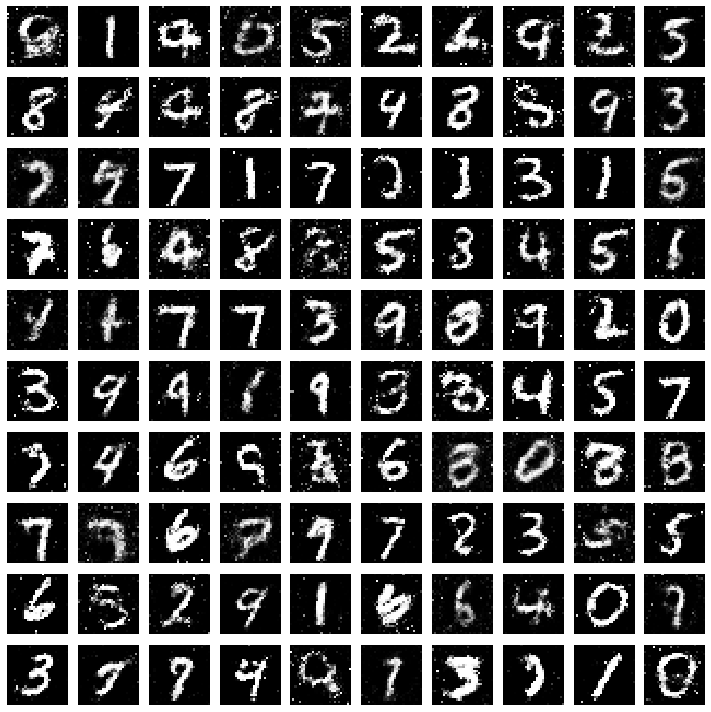

36 0.6678865472985129 0.9612295393250946
37 0.6683874951723294 0.9575494836028825
38 0.668222897964665 0.9568717362534287
39 0.6683307808433843 0.9562992076588492
40 0.670072422705145 0.9520482237522419
INFO:tensorflow:Assets written to: model/gan_gen40.hf/assets


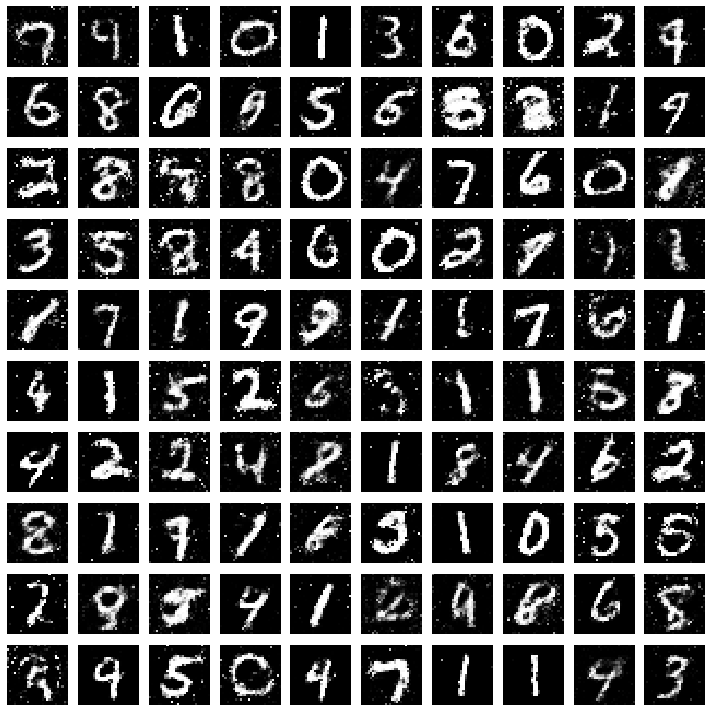

41 0.6694618017755003 0.9534945108442225
42 0.6681885027732605 0.9521198815260178
43 0.6698356757306645 0.9540976071969057
44 0.6704173415389836 0.9538040902370062
45 0.6699673073668765 0.955346697416061
INFO:tensorflow:Assets written to: model/gan_gen45.hf/assets


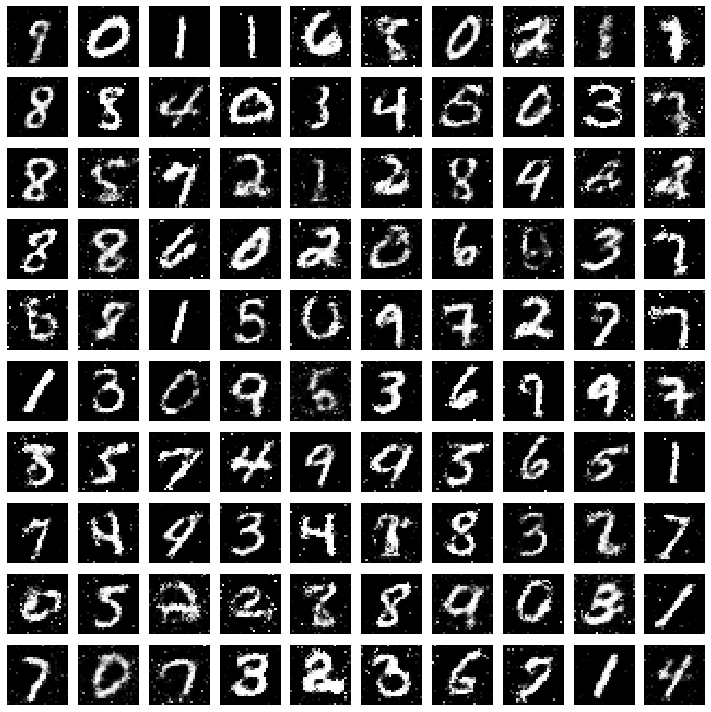

46 0.6690681192100557 0.9564773814800458
47 0.6704647698972979 0.957330226388752
48 0.6695290056304035 0.9526203860584487
49 0.6704929518139261 0.9552128676675323
50 0.6721536054825171 0.9508483216293857
INFO:tensorflow:Assets written to: model/gan_gen50.hf/assets


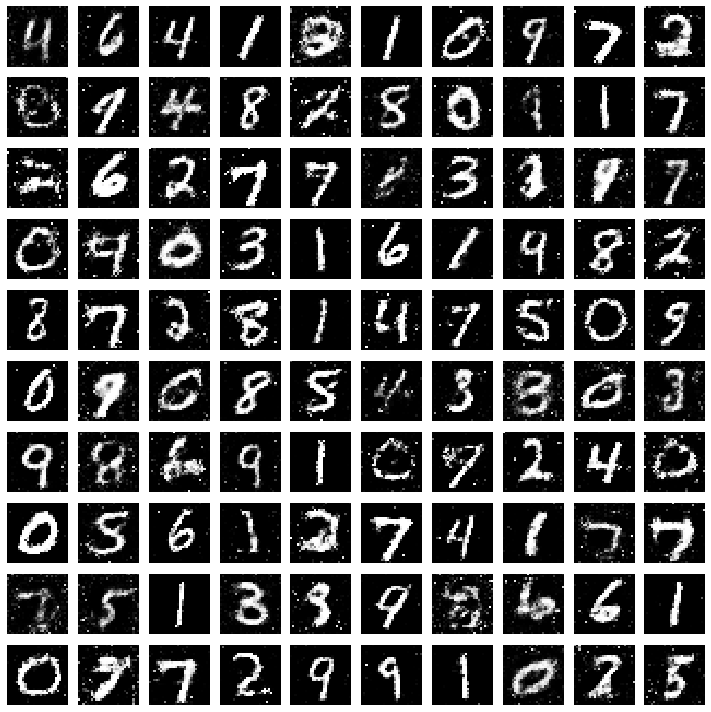

In [ ]:
for epoch in range(total_epoch):
  epoch_d_loss=0.
  epoch_g_loss=0.

  for step in range(no_of_batch):
    idx=np.random.randint(0,x_train.shape[0],half_batch)
    real_img=x_train[idx]

    noise=np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_img=genertaor.predict(noise)

    real_y=np.ones((half_batch,1))*0.9
    fake_y=np.zeros((half_batch,1))

    d_loss_real=discriminator.train_on_batch(real_img,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_img,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake

    epoch_d_loss +=d_loss

    noise=np.random.normal(0,1,size=(batch_size,noise_dim))
    ground_truth=np.ones((batch_size,1))
    g_loss=model.train_on_batch(noise,ground_truth)

    epoch_g_loss+=g_loss
  print(epoch+1,epoch_d_loss/no_of_batch,epoch_g_loss/no_of_batch)

  if (epoch+1)%5==0:
    genertaor.save("model/gan_gen{0}.hf".format(epoch+1))
    save_imgs(epoch)